In [1]:
import os
import json
path = 'rev3/'
folder = os.listdir(path)

In [29]:
review_datas={}
review_history={}
for i in folder:
    movie = os.listdir(path+i)
    with open(path+i+'/'+movie[0],'rb') as f:
        data = json.load(f)
        review_datas[i] = data
    with open(path+i+'/'+movie[1],'rb') as f:
        history = f.read()
        review_history[i] = history

In [30]:
len(review_datas['i can speak'])

14511

In [100]:
len(review_datas)

8

In [31]:
review_datas['i can speak'][0]

{'no': 1,
 'id': '킹콩민(sero****)',
 'review': '\n관람객\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t군함도랑 너무 비교되는 수작... \r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
 'rating': '10',
 'helpful': '6315',
 'non-helpful': '457',
 'date': '2017.09.21 13:01'}

In [32]:
from konlpy.tag import Okt
okt = Okt()
for movie in review_datas.keys():
    temp_list = []
    for i in review_datas[movie]: #리뷰단위
        temp =  {}
        norm = okt.normalize(i['review'])
        nouns = okt.nouns(norm)
        temp['no'] = i['no']
        temp['review'] = nouns
        temp['rating'] = i['rating']
        temp['helpful'] = i['helpful']
        temp['non-helpful'] = i['non-helpful']
        temp_list.append(temp)
    review_datas[movie] = temp_list

In [33]:
import pickle
with open('movie_noun.pkl','wb') as f:
    pickle.dump(review_datas,f)

In [143]:
import pickle
with open('movie_noun.pkl','rb') as f:
    review_datas = pickle.load(f)

In [144]:
import numpy as np
wordset={}
for movie in review_datas.keys():
    words=np.array([])
    re=[]
    for ii,i in enumerate(review_datas[movie]):
        temp = []
        for j in i['review']:
            if len(j)!=1:
                temp.append(j)
        temp = set(temp)
        if len(temp)>0:
            i['review'] = temp
            words = np.append(words,np.array(list(temp)))
            re.append(i)
    wordset[movie] = words
    review_datas[movie]=re

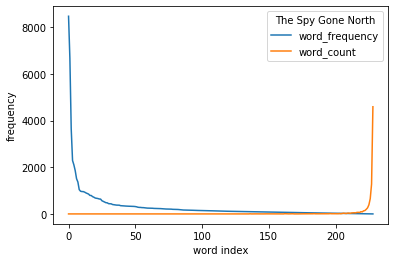

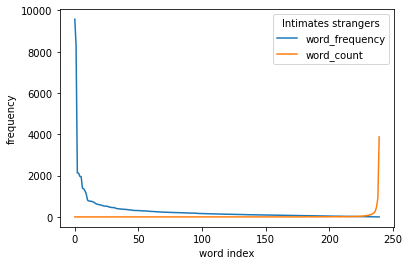

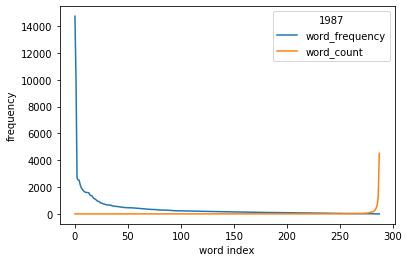

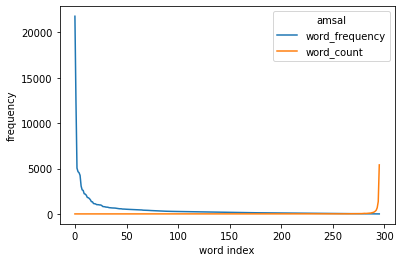

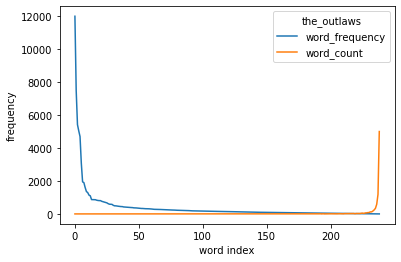

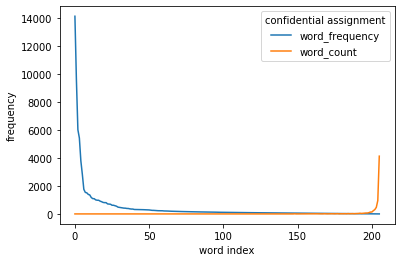

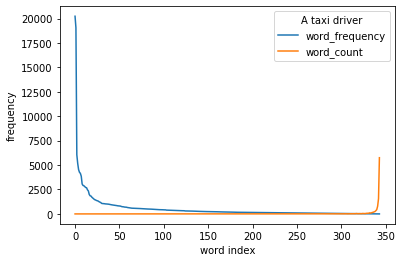

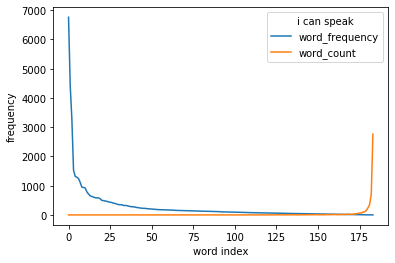

In [145]:
from matplotlib import pyplot as plt
#word_bag = 사용할 단어들 집합
word_bag={}
frequency_bag={}
for key in wordset.keys():
    #unique한 단어들 추출
    unique,count = np.unique(wordset[key],return_counts=True)
    uniq_cnt_dict = dict(zip(unique,count))
    temp = []
    uniq_cnt_dict = sorted(uniq_cnt_dict.items(),reverse=True, key = lambda x: x[1])
    frequency_bag[key] = uniq_cnt_dict
    #링크(빈도수) 상위 100개 단어만 사용
    for m,c in uniq_cnt_dict[:101]:
        temp.append(m)
    temp.remove('영화')
    word_bag[key] = temp
    
    #단어별 빈도만들기
    unique,count = np.unique(count,return_counts=True)
    wc = sorted(dict(zip(unique,count)).items(),reverse=True, key = lambda x: x[0])
    
    frequency = np.array(wc).T[0]
    count = np.array(wc).T[1]
    
    #count로 정렬하여 plot화
    #빈도가 높은 단어는 매우적음
    #빈도가 적은 단어는 매우 많음
    #빈도가 높은 단어 -> 링크가 많은 단어
    #빈도가 적고, 수가 많은 단어들 -> 링크가 거의없음
    #고빈도의 단어를 사용하자
    
    #빈도의 plot화
    fig=plt.figure()
    plt.plot(frequency,label = 'word_frequency')
    plt.plot(count, label = 'word_count')
    plt.legend(title=key)
    plt.xlabel('word index')
    plt.ylabel('frequency')
    plt.show()

In [146]:
import pickle
with open('word_bag.pkl','wb') as f:
    pickle.dump(word_bag,f)

In [147]:
import pickle
with open('movie_processed.pkl','wb') as f:
    pickle.dump(review_datas,f)

In [148]:
with open('movie_processed.pkl','rb') as f:
    review_datas = pickle.load(f)

In [149]:
with open('word_bag.pkl','rb') as f:
    word_bag = pickle.load(f)

In [150]:
#word bag의 단어들 말고 전부 제거
for movie in review_datas.keys():
    gtemp=[]
    for r_i,r in enumerate(review_datas[movie]):
        temp = []
        for w in r['review']:
            if w in word_bag[movie]:
                temp.append(w)
        # 단어 수 0개 이상인 얘들만 가져가기
        if len(temp)>0:
            #temp_i = np.random.choice(len(temp),5,replace=False)
            #temp = np.array(temp)[temp_i]
            r['review'] = temp
            gtemp.append(r)
    review_datas[movie] = gtemp

In [151]:
import pickle
with open('movie_processed_final.pkl','wb') as f:
    pickle.dump(review_datas,f)

In [65]:
import pickle
with open('movie_processed_final.pkl','rb') as f:
    review_datas = pickle.load(f)

In [66]:
for movie in review_datas.keys():
    print(len(review_datas[movie]))

19942
20712
28261
37080
25886
23716
44170
12950


In [67]:
#필터링

for movie in review_datas.keys():
    temp=[]
    for j in review_datas[movie]:
        if int(j['rating']) <= 1:
            temp.append(j)
    review_datas[movie] = temp

In [68]:
for movie in review_datas.keys():
    print(len(review_datas[movie]))

3781
911
854
759
515
1171
1537
201


In [69]:
#평균 노드당 링크 수
for movie in review_datas.keys():
    temp = 0
    for i in review_datas[movie]:
        temp+=len(i['review'])
    print(temp/len(review_datas[movie]))

2.6654324252843162
2.653128430296378
2.2096018735363
2.6218708827404478
2.5145631067961167
2.748078565328779
2.294729993493819
2.825870646766169


In [70]:
review_datas.keys()

dict_keys(['The Spy Gone North', 'Intimates strangers', '1987', 'amsal', 'the_outlaws', 'confidential assignment', 'A taxi driver', 'i can speak'])

In [71]:
review_datas[movie][0]

{'no': 139,
 'review': ['느낌', '감동', '영화인', '스토리'],
 'rating': '1',
 'helpful': '42',
 'non-helpful': '33'}

In [73]:
# 노드 20000개 셈플
import pandas as pd
import numpy as np
reviews={}
rating={}
helpful={}
nhelpful={}
for mi,movie in enumerate(review_datas.keys()):
    #review 저장
    reviews[movie] = []
    rating[movie] = []
    helpful[movie] = []
    nhelpful[movie] = []

    #랜덤샘플링
    
    index=0
    ri = np.random.choice(len(review_datas[movie]),1000,replace=False)
    
    for ii,i in enumerate(review_datas[movie]):
        if ii in ri:
            reviews[movie].append(list(i['review']))
            rating[movie].append(list(i['rating']))
            helpful[movie].append(list(i['helpful']))
            nhelpful[movie].append(list(i['non-helpful']))
            index+=1
    
for i,movie in enumerate(reviews.keys()):
    test = pd.DataFrame.from_records(reviews[movie])
    test.to_excel('project/'+str(i)+'/review.xlsx',encoding='utf-8')
    
    test = pd.DataFrame.from_records(rating[movie])
    test.to_excel('project/'+str(i)+'/rating.xlsx',encoding='utf-8')
    
    test = pd.DataFrame.from_records(helpful[movie])
    test.to_excel('project/'+str(i)+'/helpful.xlsx',encoding='utf-8')
    
    test = pd.DataFrame.from_records(nhelpful[movie])
    test.to_excel('project/'+str(i)+'/nhelpful.xlsx',encoding='utf-8')


In [159]:
review_datas.keys()

dict_keys(['The Spy Gone North', 'Intimates strangers', '1987', 'amsal', 'the_outlaws', 'confidential assignment', 'A taxi driver', 'i can speak'])